In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess

In [29]:
puzzles = pd.read_csv("C:/Users/misha/Documents/puzzles.csv")

In [40]:
plays_low = stat.median(puzzles.NbPlays)
rating_low = 1600
rating_high = stat.quantiles(data=puzzles.Rating,n=100)[95]

In [41]:
puzzles_filtered = puzzles[(puzzles.NbPlays > plays_low) & (puzzles.Rating > rating_low) & (puzzles.Rating < rating_high)]
good = puzzles_filtered[["Rating","Popularity"]]

In [42]:
rating_mapping = {}

for (i, rating) in enumerate(good.Rating):
    if rating in rating_mapping.keys():
        rating_mapping[rating].append(i)
    else:
        rating_mapping[rating] = [i]

In [43]:
ratings = good.Rating.unique()
mean_popularities = []

for rating in ratings:
    indices = rating_mapping[rating]
    popularities = good.iloc[indices, good.columns.get_loc("Popularity")]
    mean_popularities.append(stat.mean(popularities))

sm_y, sm_x = sm_lowess(ratings, mean_popularities,frac=0.25,it=5,return_sorted=True).T

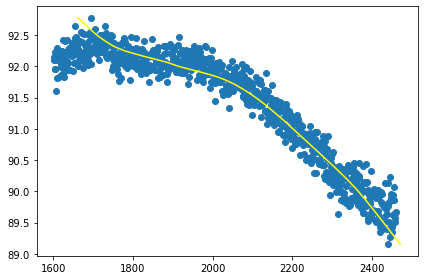

In [44]:
plt.scatter(x=ratings, y=mean_popularities)
plt.plot(sm_x,sm_y,color="yellow")
plt.xlabel = "rating"
plt.ylabel = "popularity"
plt.tight_layout()
plt.show()